# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Import Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Read data into dataframes
mouse_df = pd.read_csv("data/Mouse_metadata.csv") # Contains data about each mouse and their physical/treatment descriptions
results_df = pd.read_csv("data/Study_results.csv") # Contains time-series data about tumor growth/decline with each mouse

# Combine the data into a single DataFrame by Mouse ID since that's the one column they share
rat_df = results_df.merge(mouse_df, how="outer", on="Mouse ID")
print(rat_df.shape) # Returns (rows, columns) of dataframe
rat_df.head(20)

(1893, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [2]:
# Checking the number of unique mice.
len(rat_df["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Unless we somehow have rat quantum superposition, each Mouse ID should only have one data point per point of recorded time

# This gets the duplicate mice by duplicate Time and ID, meaning that there are somehow 2 different results for the same rat at the same time
# As it's highly unlikely for rats to be recycled for something as permanent and life-altering as tumor treatments, this is probably a clerical error on the dataset's part
rat_df[rat_df.duplicated(subset=["Mouse ID", "Timepoint"])]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
dups = rat_df[rat_df.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
dups # This is just here as a dynamic, referenceable data type so that duplicate row retrieval still works even with multiple matches

array(['g989'], dtype=object)

In [5]:
# Why we need Dups as an array, an example: Getting all the data that matches the mice with duplicate timepoints
rat_df[rat_df["Mouse ID"].isin(dups)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
rat_df.drop(rat_df[rat_df["Mouse ID"].isin(dups)].index, inplace=True) 
# df.drop takes in row indexes, so I'm just getting the array of indexes from the dataframe generated in the previous cell
rat_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
# Checking the number of mice in the clean DataFrame (Should be one less for this dataset)
# The assignment has asked for all rows matching the duplicate to be removed. This is probably because the data points in question become unreliable to use now that we cannot reliably ascertain what trajectory this mouse actually had 
len(rat_df["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
rat_group = rat_df.groupby(["Drug Regimen"]) # Apparently it's good practice to assign the groupby into a variable

sum_df = rat_group["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem", "count"]).rename(columns={"mean":"Mean Tumor Volume", "median":"Median Tumor Volume", "var":"Tumor Volume Sample Variance", "std":"Tumor Volume Sample Standard Deviation", "sem":"Tumor Volume Standard Error", "count":"Mice Timepoint Count"})
# Fortunately, each of these functions in the .agg method have been normalized to have one degree of freedom by default. If I needed to change any keyword arguments on anything, it seems that I'll have to manually do things line by line
# A count column was added to help make sense of any variation in the Standard Error

sum_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Sample Variance,Tumor Volume Sample Standard Deviation,Tumor Volume Standard Error,Mice Timepoint Count
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332,148
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181


## Bar and Pie Charts

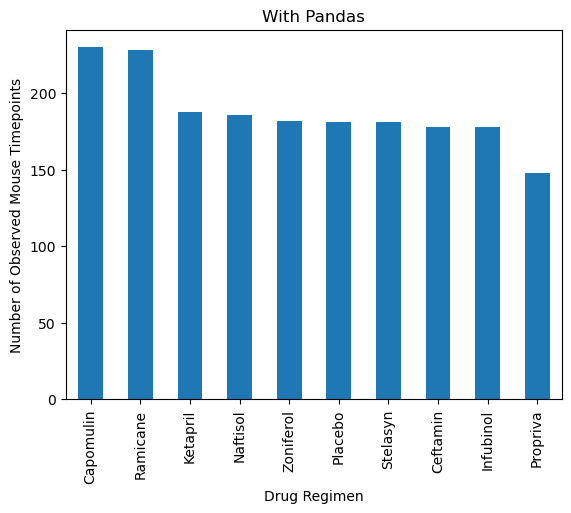

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_df = sum_df.sort_values(by="Mice Timepoint Count", ascending=False) # Just recycling this dataframe from last cell
count_df.plot(kind="bar", use_index=True, y="Mice Timepoint Count", title="With Pandas", xlabel="Drug Regimen", ylabel="Number of Observed Mouse Timepoints", legend=None)
plt.show()

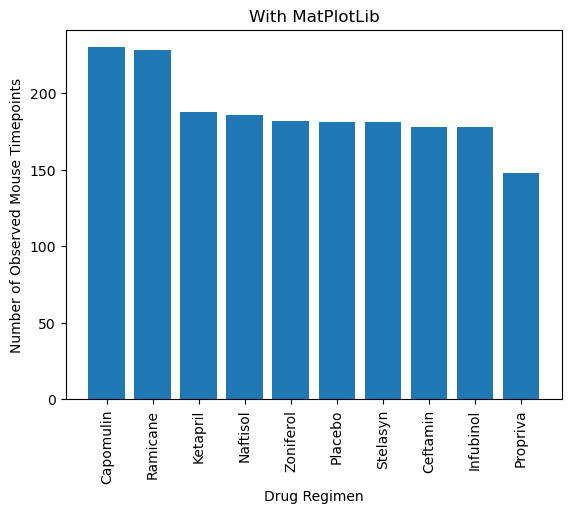

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(count_df.index, count_df["Mice Timepoint Count"])
plt.xticks(rotation=90)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.title("With MatPlotLib")

plt.show()

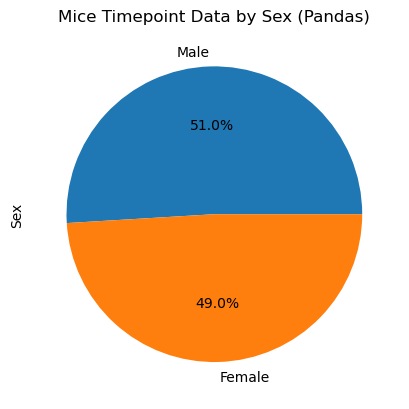

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# So, turns out, we're comparing the proportion of female vs male mice in terms of the number of time points they have
# If we ran the pie chart simply by the distribution from the metadata, we'd get 125 male mice and 123 female mice (excluding that one duplicate rat)
# However, by comparing the number of data points instead, we get 958 timepoints from the lads and 922 from the lasses, as shown by this slightly more divided pie chart below

rat_df["Sex"].value_counts().plot(kind = "pie", use_index=True, autopct="%1.1f%%", title="Mice Timepoint Data by Sex (Pandas)")
plt.show()

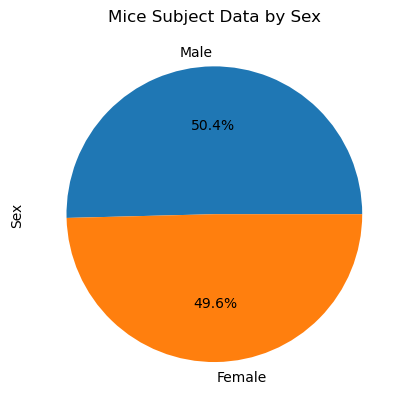

In [12]:
# Just as a comparison:
mouse_df.drop(mouse_df[mouse_df["Mouse ID"].isin(dups)].index, inplace=True)
plt.pie(mouse_df["Sex"].value_counts(), labels=["Male","Female"], autopct='%1.1f%%')
plt.title("Mice Subject Data by Sex")
plt.ylabel("Sex")
plt.show()

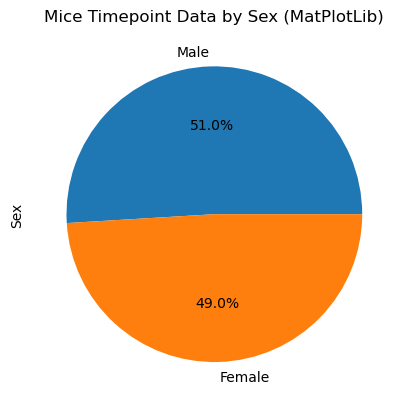

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(rat_df["Sex"].value_counts(), labels=["Male","Female"], autopct='%1.1f%%')
plt.title("Mice Timepoint Data by Sex (MatPlotLib)")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Goal: Calculate the final tumor volume of each mouse across four of the treatment regimens: 
treatments= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"] # Will be useful later for plot labels and iteration

# Gets the last (greatest) timepoint for each mouse
max_time_df = rat_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index() # Added this reset_index at the end so it's easier to merge stuff later

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_res_df = max_time_df.merge(rat_df, how="left", on=["Mouse ID", "Timepoint"]) # Left Join because I don't really need data from any other point in time
last_res_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Create empty list to fill with tumor vol data (for plotting)
max_tumor_group = last_res_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
iqr = max_tumor_group.quantile(0.75)-max_tumor_group.quantile(0.25)
lbound = max_tumor_group.quantile(0.25)-(1.5*iqr)
ubound = max_tumor_group.quantile(0.75)+(1.5*iqr)

# Mathematically extracting outliers just to prove that I know basic statistics
for i in treatments: # Refer to previous cell to see what we're iterating through
    test = max_tumor_group.get_group(i) # For each group that we want:
    print(f"{i}'s potential outliers (ID/Value): {test[(test < lbound[i]) | (test > ubound[i])]}") # Select the slice we want based off of the bounds(+/-)1.5IQR rule

Capomulin's potential outliers (ID/Value): Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers (ID/Value): Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers (ID/Value): 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers (ID/Value): Series([], Name: Tumor Volume (mm3), dtype: float64)


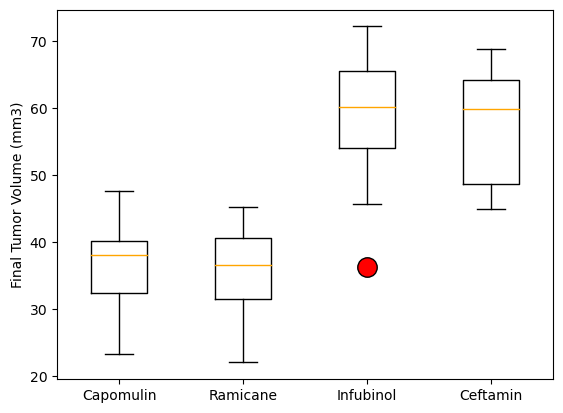

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

test = pd.concat([max_tumor_group.get_group(i).rename(i) for i in treatments], axis="columns")
test.plot(kind="box", 
          capprops={"color":"black"}, 
          whiskerprops={"color":"black"}, 
          boxprops={"color":"black"}, 
          medianprops={"color":"orange"}, 
          flierprops={"markerfacecolor":"red", "markersize":"14"}, 
          ylabel="Final Tumor Volume (mm3)") # Unfortunately, it does seem that I have to manually assign everything if I want to change colors
plt.show()

## Line and Scatter Plots

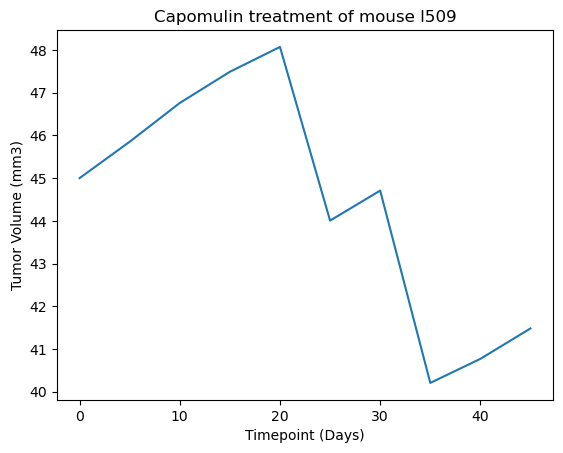

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
rat_filt_df = rat_df[rat_df["Mouse ID"]=="l509"].reset_index(drop=True)

plt.plot(rat_filt_df["Timepoint"], rat_filt_df["Tumor Volume (mm3)"])
plt.title(f"{filt_df.loc[0, 'Drug Regimen']} treatment of mouse {filt_df.loc[0, 'Mouse ID']}")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

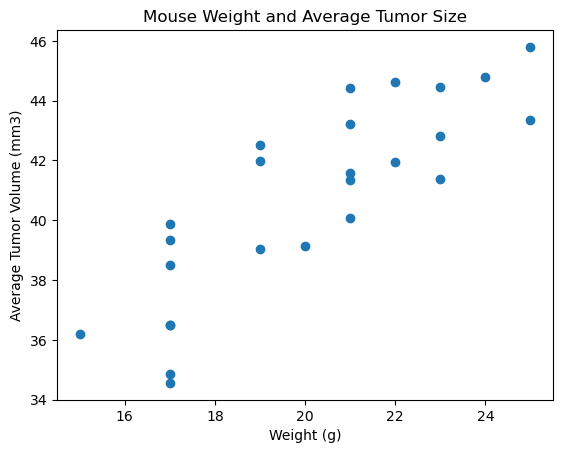

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
drug_filt_df = rat_df[rat_df["Drug Regimen"]=="Capomulin"].groupby("Mouse ID").mean(numeric_only=True)
plt.scatter(drug_filt_df["Weight (g)"], drug_filt_df["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight and Average Tumor Size")
plt.show()

## Correlation and Regression

The Pearson (R) correlation coefficient between mouse weight and average observed tumor volume here is 0.84


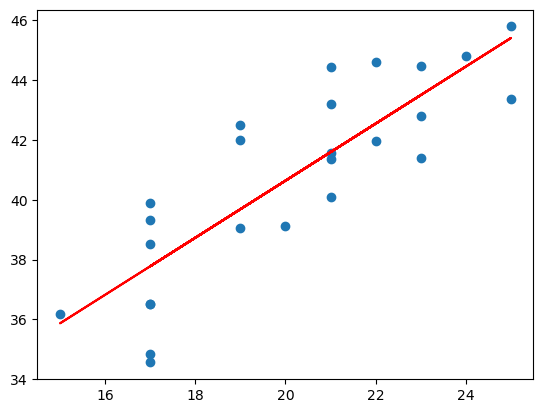

In [42]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr = st.pearsonr(drug_filt_df["Weight (g)"], drug_filt_df["Tumor Volume (mm3)"]).statistic
print(f"The Pearson (R) correlation coefficient between mouse weight and average observed tumor volume here is {corr:.2f}")
fit = np.polyfit(drug_filt_df["Weight (g)"], drug_filt_df["Tumor Volume (mm3)"], deg=1)
reg = np.polyval(fit, drug_filt_df["Weight (g)"])
plt.scatter(drug_filt_df["Weight (g)"], drug_filt_df["Tumor Volume (mm3)"])
plt.plot(drug_filt_df["Weight (g)"], reg, color="red")
plt.show()